# Project: Investigate IMDB-Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### For this exercise, I am using the tmdb-movie dataset. In this dataset, there are list of movies between 1960 and 2015 with their box office collections, cast, genres, and many other details. Being a movie-buff, I am really excited to be working on this dataset.

<ul>
<li><a href="#explo7"> Plot a histogram of Average Votes and see the distribution.</a></li>
<li><a href="#explo1"> Find the biggest box office hits by inflation-adjusted Profit every year.</a></li>
<li><a href="#explo2"> Find correlation between various fields to see if there is anything that comes out of it.</a></li>
<li><a href="#explo3"> How does the Movie runtime changing over time? (Does any specific genre contributes to the shorter/longer runtime?).</a></li>
<li><a href="#explo4"> Explore the Keywords field in the dataset to find patterns. </a></li>
<li><a href="#explo5"> Try to find a correlation between budget and revenue every decade. </a></li>
<li><a href="#explo6"> Find out the Top 5 Movie Genres by Gross Profit every Decade. </a></li>
</ul>

In [33]:
#importing python libraries
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [34]:
#load data into dataframe
df=pd.read_csv('C:\\Users\\puspa\\datafiles\\tmdb-movies.csv', 
               index_col='id')

In [35]:
#inpecting the top two rows
df.head(2)

imdb_id  popularity     budget     revenue      original_title  \
id                                                                         
135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
76341   tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                     cast  \
id                                                          
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
76341   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                             homepage         director             tagline  \
id                                                                           
135397  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
76341     http://www.madmaxmovie.com/    George Miller  What a Lovely Day.   

                                                 keywords  \
id                                                          
135397  monster|dna|tyrannosaurus rex|velociraptor|island   
76341    future|chase|post-apocalyptic|dystopia|australia   

                                                 overview  runtime  \
id                                                                   
135397  Twenty-two years after the events of Jurassic ...      124   
76341   An apocalyptic story set in the furthest reach...      120   

                                           genres  \
id                                                  
135397  Action|Adventure|Science Fiction|Thriller   
76341   Action|Adventure|Science Fiction|Thriller   

                                     production_companies release_date  \
id                                                                       
135397  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
76341   Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
id                                                                          
135397        5562           6.5          2015  1.379999e+08  1.392446e+09  
76341         6185           7.1          2015  1.379999e+08  3.481613e+08

In [36]:
df.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### Quick observations and fix in earlier steps:
##### Release data was in object format, converted it to a date
##### Genres , Production_Companies are the fields with multiple values concatenated. It needs to be splitted to be able to plot metrics by genres

In [37]:
df['release_date']=pd.to_datetime(df.release_date)
df.dtypes

imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [38]:
#add profit & profit(adjusted) field (Gross Profit)

df['profit_adj'] = df['revenue_adj']- df['budget_adj']  
df['profit'] = df['revenue']- df['budget']

In [39]:
#remove rows with null ID or zero Budget and Revenue

df.where((df['imdb_id']!='') & (df['budget_adj']>=1.0) &  (df['revenue_adj']>=1.0))
df.dropna()

imdb_id  popularity     budget     revenue  \
id                                                     
135397  tt0369610   32.985763  150000000  1513528810   
76341   tt1392190   28.419936  150000000   378436354   
262500  tt2908446   13.112507  110000000   295238201   
140607  tt2488496   11.173104  200000000  2068178225   
168259  tt2820852    9.335014  190000000  1506249360   
...           ...         ...        ...         ...   
668     tt0064757    1.778746    7000000    81974493   
948     tt0077651    1.198849     300000    70000000   
8469    tt0077975    1.157930    2700000   141000000   
13963   tt0077838    0.064029          0      321952   
16214   tt0077696    0.044675          0    78000000   

                         original_title  \
id                                        
135397                   Jurassic World   
76341                Mad Max: Fury Road   
262500                        Insurgent   
140607     Star Wars: The Force Awakens   
168259                        Furious 7   
...                                 ...   
668     On Her Majesty's Secret Service   
948                           Halloween   
8469                       Animal House   
13963                    The Last Waltz   
16214                            Hooper   

                                                     cast  \
id                                                          
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
76341   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
262500  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
140607  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
168259  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
...                                                   ...   
668     George Lazenby|Diana Rigg|Telly Savalas|Gabrie...   
948     Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...   
8469    John Belushi|Tim Matheson|John Vernon|Verna Bl...   
13963   Robbie Robertson|Rick Danko|Levon Helm|Richard...   
16214   Burt Reynolds|Robert Klein|Adam West|Jan-Micha...   

                                                 homepage          director  \
id                                                                            
135397                      http://www.jurassicworld.com/   Colin Trevorrow   
76341                         http://www.madmaxmovie.com/     George Miller   
262500     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
140607  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
168259                           http://www.furious7.com/         James Wan   
...                                                   ...               ...   
668     http://www.mgm.com/view/movie/1411/On-Her-Maje...     Peter R. Hunt   
948     http://www.theofficialjohncarpenter.com/hallow...    John Carpenter   
8469                          http://www.animalhouse.com/       John Landis   
13963   http://www.mgm.com/#/our-titles/1092/The-Last-...   Martin Scorsese   
16214          http://en.wikipedia.org/wiki/Hooper_(film)       Hal Needham   

                                                  tagline  \
id                                                          
135397                                  The park is open.   
76341                                  What a Lovely Day.   
262500                         One Choice Can Destroy You   
140607                      Every generation has a story.   
168259                                Vengeance Hits Home   
...                                                   ...   
668     Far up! Far out! Far more! James Bond 007 is b...   
948                               The Night HE Came Home!   
8469    It was the Deltas against the rules... the rul...   
13963   It Started as a Concert. It Became a Celebration.   
16214                        The greatest stuntman alive!   

                                                 keywords  ...  \
id                                     

In [40]:
#drop any duplicate record
df.drop_duplicates(subset ="original_title", 
                     keep = False, inplace = True)

In [41]:
# Make the metrics in Millions format for easy display and readability

cols= ['budget_adj','revenue_adj','profit_adj','budget','revenue','profit']

df[cols] = round(df[cols]/1000000,0)

df.head()

imdb_id  popularity  budget  revenue                original_title  \
id                                                                             
135397  tt0369610   32.985763   150.0   1514.0                Jurassic World   
76341   tt1392190   28.419936   150.0    378.0            Mad Max: Fury Road   
262500  tt2908446   13.112507   110.0    295.0                     Insurgent   
140607  tt2488496   11.173104   200.0   2068.0  Star Wars: The Force Awakens   
168259  tt2820852    9.335014   190.0   1506.0                     Furious 7   

                                                     cast  \
id                                                          
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
76341   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
262500  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
140607  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
168259  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                                 homepage          director  \
id                                                                            
135397                      http://www.jurassicworld.com/   Colin Trevorrow   
76341                         http://www.madmaxmovie.com/     George Miller   
262500     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
140607  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
168259                           http://www.furious7.com/         James Wan   

                              tagline  \
id                                      
135397              The park is open.   
76341              What a Lovely Day.   
262500     One Choice Can Destroy You   
140607  Every generation has a story.   
168259            Vengeance Hits Home   

                                                 keywords  ...  \
id                                                         ...   
135397  monster|dna|tyrannosaurus rex|velociraptor|island  ...   
76341    future|chase|post-apocalyptic|dystopia|australia  ...   
262500  based on novel|revolution|dystopia|sequel|dyst...  ...   
140607              android|spaceship|jedi|space opera|3d  ...   
168259                car race|speed|revenge|suspense|car  ...   

                                           genres  \
id                                                  
135397  Action|Adventure|Science Fiction|Thriller   
76341   Action|Adventure|Science Fiction|Thriller   
262500         Adventure|Science Fiction|Thriller   
140607   Action|Adventure|Science Fiction|Fantasy   
168259                      Action|Crime|Thriller   

                                     production_companies release_date  \
id                                                                       
135397  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
76341   Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   
262500  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18   
140607          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
168259  Universal Pictures|Original Film|Media Rights ...   2015-04-01   

       vote_count vote_average  release_year  budget_adj  revenue_adj  \
id                                                                      
135397       5562          6.5          2015       138.0       1392.0   
76341        6185          7.1          2015       138.0        348.0   
262500       2480          6.3          2015       101.0        272.0   
140607       5292          7.5          2015       184.0       1903.0   
168259       2947          7.3          2015       175.0       1386.0   

        profit_adj  profit  
id                          
135397      1254.0  1364.0  
76341        210.0   228.0  
262500       170.0   185.0  
140607      1719.0  1868.0  
168259      1211.0  1316.0  

[5 rows x 22 columns]

In [42]:
#Split the Genres into its own category

genres = df['genres'].str.split('|',expand=True).stack().to_frame(name='genre')
genres.head(3)

genre
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction

In [43]:
#keep the index so that it can be joined back to the main dataframe "df"

genres.index = genres.index.droplevel(1)
genres.head(2)

genre
id               
135397     Action
135397  Adventure

<a id='eda'></a>
## Exploratory Data Analysis

<a id='explo6'></a>
### 1) Plot a histogram of Average Votes and see the distribution.

In [90]:
f, ax = plt.subplots(figsize=(10, 4))

# Plot top Movies
df["vote_average"].hist(bins=10)

#sns.barplot(x="profit_adj", y='Title-year', data=Top_movies_Every_Year.sort_values('profit_adj',ascending=False), 
 #           label="Gross Profit")

#formatting and labels
ax.set_title('\nDistribution (Histogram) of Average Votes\n',fontsize=20)
ax.set(xlabel="Average Votes", ylabel="Frequency")
sns.despine(left=True, bottom=True, trim=True)
plt.grid(False)


#### Average votes seems to be nicely distributed in the dataset.  higher percentage of the movies in the dataset have a rating between 5 to 7, which means that most of the movies made between 1965 and 2015 have above average or better poularity.

<a id='explo1'></a>
### 2) Find the biggest box office hits by inflation-adjusted Profit every year.

In [44]:
Movie_profit_every_year=df.groupby(['release_year','original_title'], as_index=False).agg({'profit_adj':'sum'}) 
Movie_profit_every_year.head(5)


Top_movies_Every_Year = Movie_profit_every_year[['release_year','original_title','profit_adj']].sort_values(['release_year','profit_adj'],ascending=False).groupby('release_year',sort=True).head(1)


Top_movies_Every_Year.head(5)


release_year                                original_title  profit_adj
10106          2015                  Star Wars: The Force Awakens      1719.0
9562           2014     The Hobbit: The Battle of the Five Armies       649.0
8647           2013                                    Iron Man 3       950.0
8216           2012                                       Skyfall       863.0
7482           2011  Harry Potter and the Deathly Hallows: Part 2      1166.0

### Function

In [129]:
# Convert the big numebrs to a human readable format (Millions, Billions and so on)

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'B', 'T', 'P'][magnitude])

In [130]:
Top_movies_Every_Year['Title-year'] = Top_movies_Every_Year['original_title']+" ("+ (Top_movies_Every_Year['release_year']).astype(str)+")"

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 17))


# Plot top Movies
sns.barplot(x="profit_adj", y='Title-year', data=Top_movies_Every_Year.sort_values('profit_adj',ascending=False), 
            label="Gross Profit")

#formatting and labels
ax.set_title('\nTOP BOX OFFICE HITS by GROSS PROFIT (inflation adjusted) EVERY YEAR (1960-2015) \n',fontsize=20)
ax.set(xlabel="Gross Profit (in Millions)", ylabel="Movie (Release Year)")
sns.despine(left=True, bottom=True)

totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+10, i.get_y()+.55, \
            (human_format(i.get_width()*1000000)), fontsize=10,    #used the user_function to format the numbers
            
color='dimgrey')

#### The Bar graph shows the list of movies that generated the most Gross profit every year. 1977 movie Star wars seems to be on the top of the list amond all the yearly top-grossers. 2009 movie Avatar is at the second place.

##### *This is assuming that we have all the movies between 1960-2015 in the data set and also we are looking the Inflation adjusted gross profit.

<a id='explo2'></a>

###  3) Find correlation between various fields to see if there is anything that comes out.

In [46]:
df_corr = df.corr(method='pearson')

Text(0.5, 1, '\nFind Correlation among Variables\n')

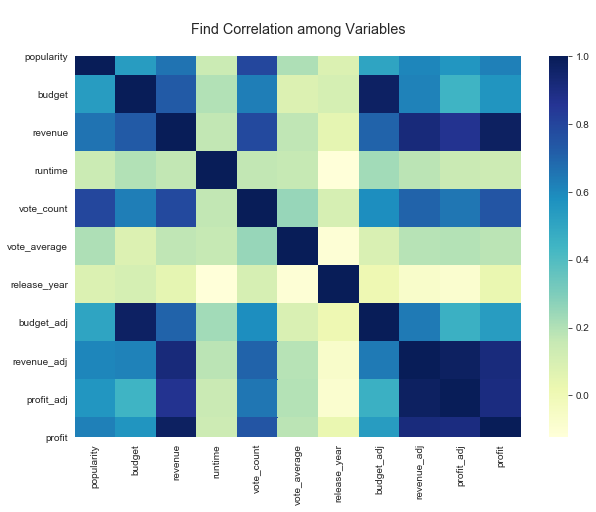

In [135]:
ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_corr, cmap="YlGnBu")
plt.title("\nFind Correlation among Variables\n")

##### One this that sticks out on this is release year seem to be negatively correlated to Run time. It would be interesting to see if there is a story there.

#### Also, Budget and Revenue seem t be highly correlated, which suggests that higer budget movies generate more revenues.

<a id='explo3'></a>
### 4) How does the Movie runtime changing over time? (Does any specific genre contributes to the shorter/longer runtime?).

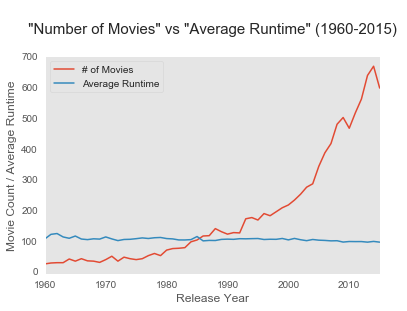

In [48]:
df_movie_count_runtime=df.groupby('release_year').agg({'imdb_id':'size', 'runtime':'mean'})\
.rename(columns = {'imdb_id': '# of Movies', 'runtime': 'Average Runtime'})

plt.style.use('ggplot')

# Plot top Movies
df_movie_count_runtime.groupby(['release_year']).sum().plot.line()


#formatting and labels
plt.title('\n "Number of Movies" vs "Average Runtime" (1960-2015) \n',fontsize=15)


plt.xlabel('Release Year')
plt.ylabel('Movie Count / Average Runtime')
plt.grid(False)

### It's pretty clear from the dataset that, numbers of movies made is growing  every year.

### Average run time seems going down every year. I'm going to plot the two metric in different axis to see if the average runtime  trend is steep enough to do any further research.

In [49]:
df[['release_year','imdb_id']].groupby(['release_year']).count().plot.line()

plt.style.use('ggplot')

plt.title('\nNumber of Movies by year (1960-2015) \n',fontsize=15)
plt.xlabel('Release Year')
plt.ylabel('# of Movies')
plt.legend('')
plt.grid(False)

df[['release_year','runtime']].groupby(['release_year']).mean().plot.line()

plt.title('\nMovies Runtime by year (1960-2015) \n',fontsize=15)
plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.legend('')
plt.grid(False)

### From the above line charts, it looks like Average Run time is trending down from 1960 to 2015. 

#### There could be many reasons for that but, I think many short movies like, Documentaries, thrillers etc. being made in recent years could be contributing towards the downward trend. So, it would be interesting to analyze the trend by each genres.



In [50]:
#Movie runtime by Genres each year
Movie_runtime_by_genres_yearly = pd.merge(genres, df[['release_year','runtime']] , left_on='id', right_on='id', how='left')

#Average runtime by Genres each year

Movie_avg_runtime_by_genres_yearly=Movie_runtime_by_genres_yearly.groupby(['genre','release_year'], as_index=False).mean()

Movie_avg_runtime_by_genres_yearly.head(5)

genre  release_year  runtime
0  Action          1960  122.000
1  Action          1961  134.000
2  Action          1962  125.375
3  Action          1963  136.000
4  Action          1964  128.750

#### Upon investigating, I found that there are a few movies with runtime of more than 500 minutes or close to 0 minutes. Most o fthe seem to be Historical TV series or Animated series.

#### I've filtered those outliers from the dataset to be able to plot a smooth line.

In [51]:
Movie_runtime_by_genres_yearly = Movie_runtime_by_genres_yearly.where((Movie_runtime_by_genres_yearly['runtime']<200)\
                                     & (Movie_runtime_by_genres_yearly['runtime']>5))

Movie_avg_runtime_by_genres_yearly=Movie_runtime_by_genres_yearly.groupby(['genre','release_year'], as_index=False).mean()

Movie_avg_runtime_by_genres_yearly.head(5)

genre  release_year  runtime
0  Action        1960.0  104.800
1  Action        1961.0  134.000
2  Action        1962.0  125.375
3  Action        1963.0  136.000
4  Action        1964.0  128.750

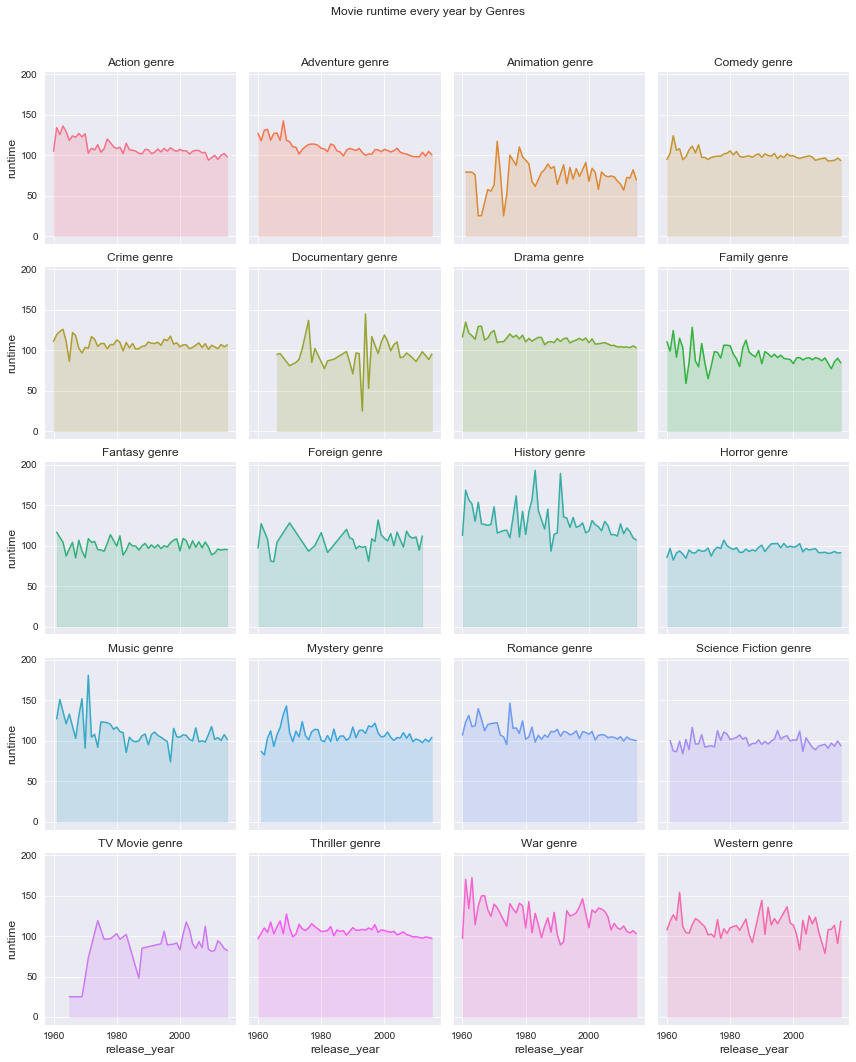

In [95]:
# Create a grid : initialize it
g = sns.FacetGrid(Movie_avg_runtime_by_genres_yearly, col='genre', hue='genre', col_wrap=4, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'release_year', 'runtime')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'release_year', 'runtime', alpha=0.2).set_titles("{col_name} genre")

# Add a title for the whole ploT
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Movie runtime every year by Genres')
sns.despine(left=True, bottom=True, trim=True)
plt.show()


#### Movie run times in most of the genres seems to be trending down or remained flat in the time period betwen 1960 -2015.  
#### The movie runtime in "Actions", "Adventure and "Musical" genres seems to be trending downwards the most. 

<a id='explo4'></a>
### 5) Explore the Keyward field in the dataset to find patterns.

##### a Wordcloud would be a great way to find promintent keywords

In [92]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = ("based","on","based on")).generate(' '.join(df['keywords'].fillna('')))
plt.figure( figsize=(15,8) )
plt.imshow(wordcloud, interpolation="bilinear") #"Bilinear makes the workds smoother"
plt.axis("off")
plt.title("\n Wordcloud of Keywords \n",fontsize=20)
plt.show()

##### The top Keywards suggest that there are many Independent fims made between 1965 and 2015. Also, the wordcloud suggests thats there are many movies made by women directors, movies based on Novels and New Your city appears prominately in the dataset.

<a id='explo5'></a>
### 6) Try to find a correlation between budget and revenue every decade.

In [54]:
df["decade"] = (df["release_year"]//10)*10

movie_every_decade = df[['decade','original_title','budget','revenue']]

movie_every_decade.groupby('decade').mean().plot.bar()

#formatting and labels
plt.title('\n Budget vs Revenue every decate (1960-2010) \n (1960 & 2010 contains only 5 years of data)\n',fontsize=15)


plt.xlabel('Decade')
plt.ylabel('Average $ in Milions')
plt.grid(False)
                        

#### This Analysis suggests that average movie making budgest had constantly increased every decade and the return on investment seem to have also improved every decade. 

#### Budgest seems to have doubled in 1990s compared to 80s and the return on investmennt seem to have gone up signig=ficantly since then.

In [55]:
movie_every_decade["Gross profit%"] = (movie_every_decade["revenue"]-movie_every_decade["budget"])/abs(movie_every_decade["budget"])

movie_every_decade["Highly Profittable?"] =  movie_every_decade["Gross profit%"].gt(.5)

movie_every_decade.head(5)

C:\Users\puspa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\puspa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


decade                original_title  budget  revenue  Gross profit%  \
id                                                                             
135397    2010                Jurassic World   150.0   1514.0       9.093333   
76341     2010            Mad Max: Fury Road   150.0    378.0       1.520000   
262500    2010                     Insurgent   110.0    295.0       1.681818   
140607    2010  Star Wars: The Force Awakens   200.0   2068.0       9.340000   
168259    2010                     Furious 7   190.0   1506.0       6.926316   

        Highly Profittable?  
id                           
135397                 True  
76341                  True  
262500                 True  
140607                 True  
168259                 True

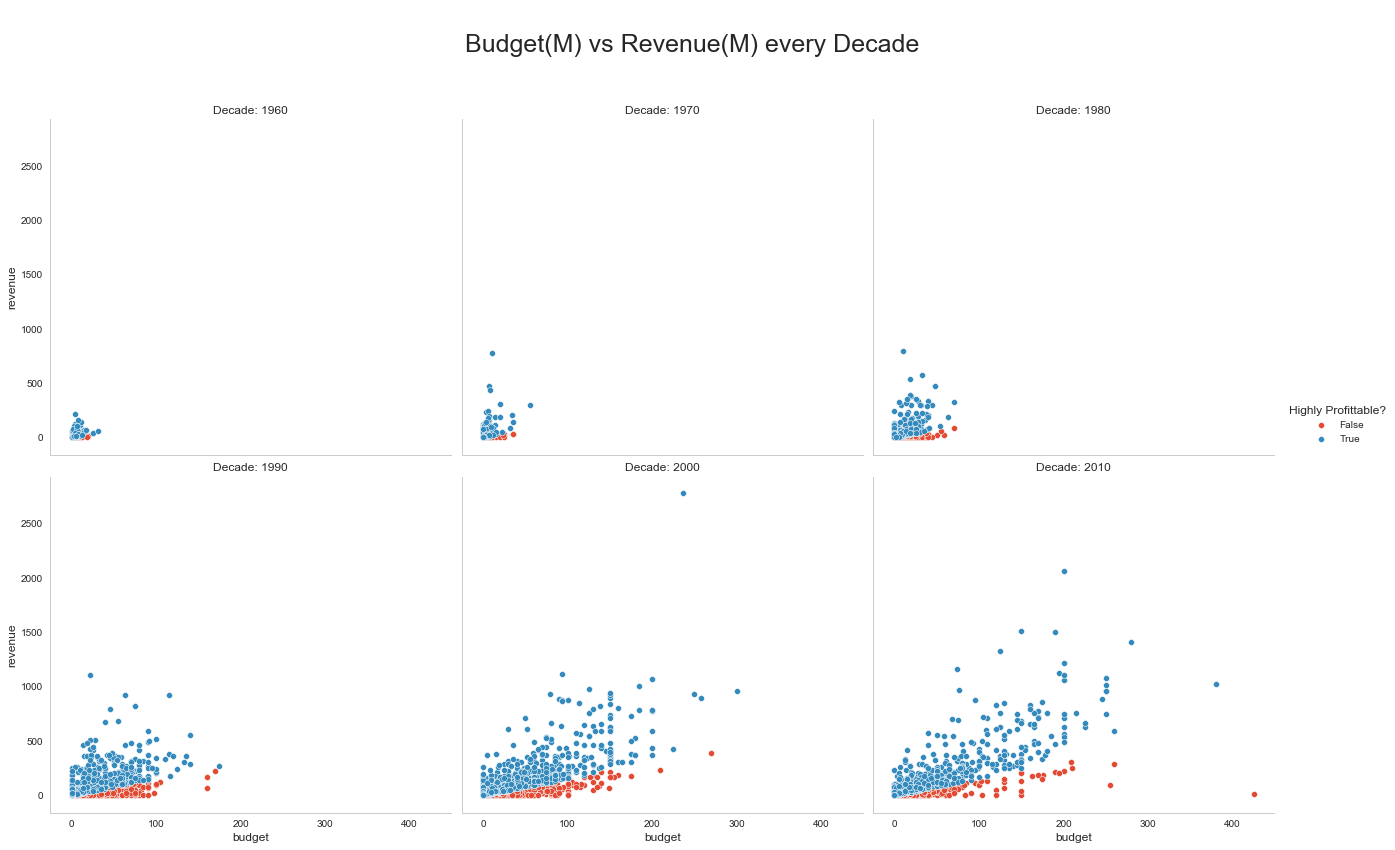

NameError: name 'draw' is not defined

In [103]:
sns.set_style("whitegrid", {'axes.grid' : False})

g = sns.FacetGrid(movie_every_decade, col='decade', hue= 'Highly Profittable?', col_wrap=3, height = 6,
                 dropna=True)
g= (g.map(plt.scatter, 'budget', 'revenue', edgecolor="w").add_legend())

# Fill the area with fill_between
g = g.set_titles("Decade: {col_name}")
# Add a title for the whole ploT
plt.subplots_adjust(top=0.85)
g = g.fig.suptitle('\nBudget(M) vs Revenue(M) every Decade\n',fontsize =25) 
plt.show()

#### Each point in the Scatterplot represents a movie title. It's pretty obvious that there are a lot more movies being made every passing decade. 

#### Colors in the chart means whather it's the revenue earned is at least 50% above budget or  not. (Gross profit>50%)

#### Also, we can see the pattern across the 6 decades that, high budgeted movies seem to be generating more revenue barring a few outliers.

<a id='explo6'></a>
### 7) Find out the Top 5 Movie Genres by Gross Profit every Decade.

In [57]:
movie_every_decade_genres = pd.merge(genres, movie_every_decade , left_on='id', right_on='id', how='left')
movie_every_decade_genres["Gross Profit"] =  movie_every_decade_genres["revenue"] - movie_every_decade_genres["budget"]

movie_every_decade_genres= movie_every_decade_genres.groupby(['decade','genre']).mean().reset_index()
movie_every_decade_genres.head(5)

decade      genre    budget    revenue  Gross profit%  Highly Profittable?  \
0    1960     Action  2.698630  11.835616            inf             0.205479   
1    1960  Adventure  3.444444  21.481481       8.825928             0.314815   
2    1960  Animation  0.266667  14.400000      53.000000             0.066667   
3    1960     Comedy  0.787879   6.272727            inf             0.161616   
4    1960      Crime  1.351351   8.864865            inf             0.297297   

   Gross Profit  
0      9.136986  
1     18.037037  
2     14.133333  
3      5.484848  
4      7.513514

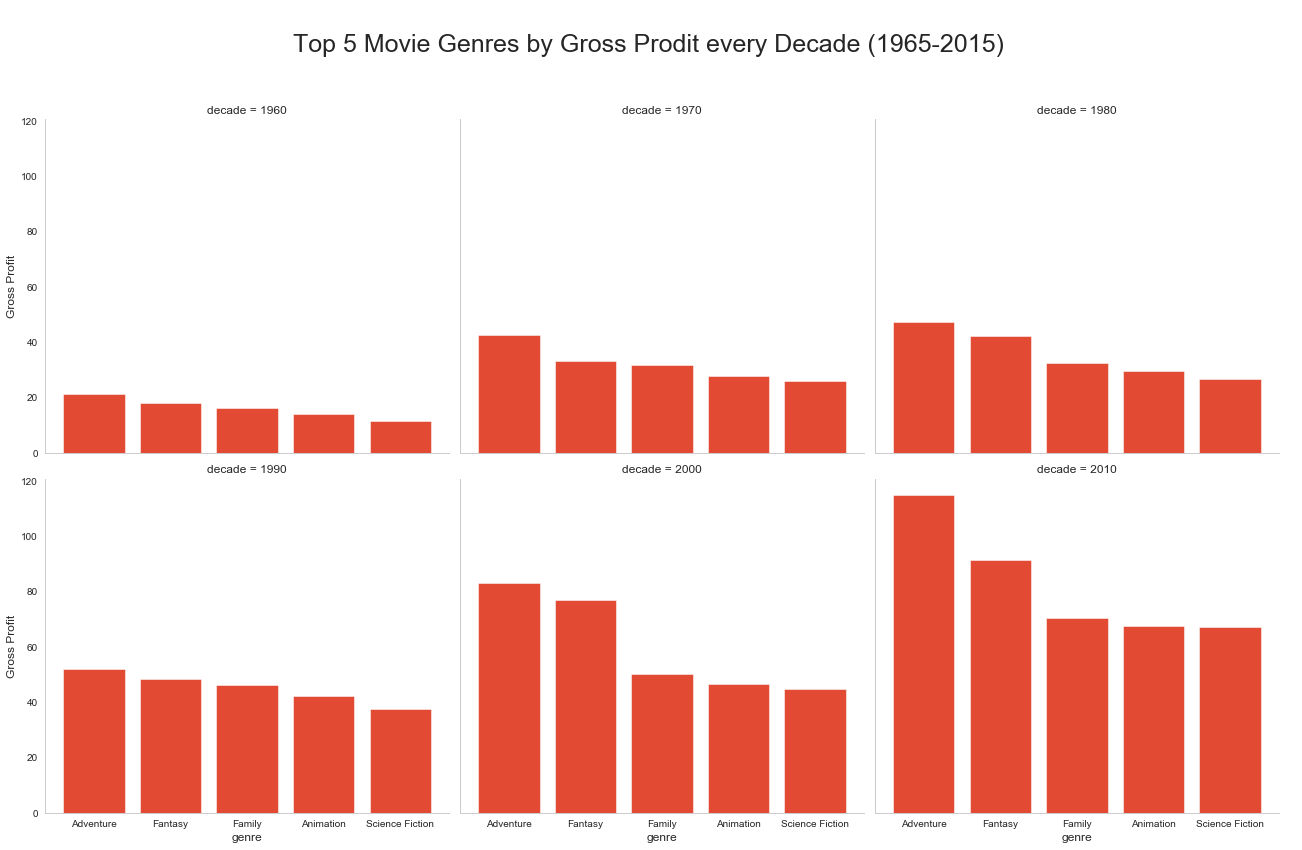

In [58]:
sns.set_style("whitegrid", {'axes.grid' : False})

g = sns.FacetGrid(movie_every_decade_genres.sort_values('Gross Profit',ascending=False).groupby(['decade']).head(5), 
                  col='decade',   col_wrap=3, height = 6, dropna=True)
g= (g.map(plt.bar, 'genre', 'Gross Profit', edgecolor="w").add_legend())


plt.subplots_adjust(top=0.85)
g = g.fig.suptitle('\nTop 5 Movie Genres by Gross Prodit every Decade (1965-2015)\n',fontsize =25) 
plt.show()

##### It's evident from the Analysis that Adventure movies have been the most profittable movie genres every decade. Also, the set of Top 5 movie genres have remained the same over the years.
#### Another interesting insight from the dataset is, Science fiction genres has been closing in on the Animation categories and it could easily surpass the animation genres soon.

<a id='conclusions'></a>
## Conclusions

##### 1) In this Analysis we looked at the biggest box office hits by inflation-adjusted Profit every year and the 1977 movie Star wars tops of the list.
##### 2) Then we plotted the correlation between various fielmetrics abd cound that Budget seems to be highy correlated with revenue and also, the year seems to be negatively correlated to Movie runtime.
##### 3) From the Movie runtime trend I found that, the Movie run times in most of the genres seems to be trending down or remained flat in the time period betwen 1960 -2015.  "Actions", "Adventure and "Musical" genres seems to be trending downwards the most. 
##### 4) The Keywords wordcloud suggests thats there are many movies made by women directors, many moved are made based on Novels and New Your city appears prominately as a keyword in the dataset.
##### 5) Fom the Scatter plot, I found the pattern across the 6 decades that, high budgeted movies seem to be generating more revenues barring a few outliers.
##### 6) The Top 5 Movie Genres by Gross Profit every Decade suggests that Adventure movies have been the most profittable movie genres every decade. Also, the set of Top 5 movie genres have remained the same over the years. Another interesting insight from the dataset is, Science fiction genres has been catching up t the Animation categories and it could easily surpass the animation genres soon..

### Assumptions

I have a made a few assumptions while analyzing the dataset:
   ###### 1) the dataset includes all the movies in the 1965-2015 time period.
   ###### 3) Inflation adjusted number changes over time, so, it may look diffferent when the dataset is updated with new movies/ years.
   ###### 3) It's difficult to determine wheather a movie is proffitable based on the dataset. We can only estimate teh gross profit but, we need more details to get the Net profit because some of the expenses and taxes paid etc may not be included in the budget metric.
   
    
   

## Websites referred for this excercize:

### stackoverflow.com
### pandas.pydata.org
### pandas.pydata.org
### python-graph-gallery.com